<a href="https://colab.research.google.com/github/towkictg/Malicious-URL-detection---Decision-Tree-from-scratch/blob/main/url_detection_new_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#imports
import pandas as pd
import numpy as np
import random
#for split only
from sklearn.model_selection import train_test_split

In [36]:
# Load Url Data
#urlsdata2 is for tesing only
#urlsdata2 is from another dataset unique from the training dataset
#urlsdata2 will be used for calculating precision and accuracy
urlsdata = pd.read_csv("urldata.csv")
urlsdata2 = pd.read_csv("unique_urls_with_columns.csv")


In [37]:
urlsdata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [38]:
urlsdata.shape

(450176, 4)

In [39]:
# Display the count of each label in the specified column
import pandas as pd

label_counts = urlsdata['label'].value_counts()
print("Label counts in urldata:")
print(label_counts)


label_counts2 = urlsdata2['label'].value_counts()
print("Label counts in urldata2:")
print(label_counts2)

Label counts in urldata:
label
benign       345738
malicious    104438
Name: count, dtype: int64
Label counts in urldata2:
label
malicious    211932
benign        29484
Name: count, dtype: int64


In [40]:
#data sampling
urldata = urlsdata.sample(frac=0.60, random_state=42)
urldata2 = urlsdata2.sample(frac=0.99, random_state=42)
# Optional: Reset the index if you want a clean index for the new DataFrame
urldata.reset_index(drop=True, inplace=True)
urldata2.reset_index(drop=True, inplace=True)



In [41]:
!pip install tld

In [42]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [43]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata2['url_length'] = urldata2['url'].apply(lambda i: len(str(i)))

In [44]:
urldata.head()
urldata2.head()

,url,label,result,url_length
0,http://45.161.254.216:34727/Mozi.m,malicious,1,34
1,http://www.verrijzenisgemeenschap.nl/index.php...,malicious,1,94
2,http://himg2.huanqiu.com/attachment2010/2015/0...,malicious,1,77
3,update-account.2017-support.team.comerv0.webs0...,malicious,1,104
4,hscripts.com/tutorials/html/,malicious,1,28


In [45]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

#Hostname Length
urldata2['hostname_length'] = urldata2['url'].apply(lambda i: len(urlparse(i).netloc))

#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

#Path Length
urldata2['path_length'] = urldata2['url'].apply(lambda i: len(urlparse(i).path))

In [46]:
#First Directory Length / length after domain name
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))
urldata2['fd_length'] = urldata2['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain like .com .org
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
urldata2['tld'] = urldata2['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))
urldata2['tld_length'] = urldata2['tld'].apply(lambda i: tld_length(i))

In [47]:
urldata.shape

(270106, 10)

In [48]:
#drop top level doman
urldata = urldata.drop("tld", axis=1)
urldata2 = urldata2.drop("tld", axis=1)

urldata.shape


(270106, 9)

In [50]:
#count '-'
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata2['count-'] = urldata2['url'].apply(lambda i: i.count('-'))

#count '@'
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata2['count@'] = urldata2['url'].apply(lambda i: i.count('@'))

#count '?'
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata2['count?'] = urldata2['url'].apply(lambda i: i.count('?'))

#count '%'
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata2['count%'] = urldata2['url'].apply(lambda i: i.count('%'))

#count '.'
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata2['count.'] = urldata2['url'].apply(lambda i: i.count('.'))

#count '='
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata2['count='] = urldata2['url'].apply(lambda i: i.count('='))

#count 'http'
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata2['count-http'] = urldata2['url'].apply(lambda i : i.count('http'))

#count 'https'
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata2['count-https'] = urldata2['url'].apply(lambda i : i.count('https'))

#count www
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))
urldata2['count-www'] = urldata2['url'].apply(lambda i: i.count('www'))

In [51]:
#count digits
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))
urldata2['count-digits']= urldata2['url'].apply(lambda i: digit_count(i))

#count letters
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))
urldata2['count-letters']= urldata2['url'].apply(lambda i: letter_count(i))

#count '/' means same as count no. of directories
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))
urldata2['count_dir'] = urldata2['url'].apply(lambda i: no_of_dir(i))

In [52]:
urldata.head()

,Unnamed: 0,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,...,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,367504,http://centralassociatesltd.com/richieeee/inde...,malicious,1,51,24,20,9,3,0,...,0,0,2,0,1,0,0,0,44,2
1,286248,https://www.sbsmnlaw.com/attorney-profiles/,benign,0,43,16,19,17,3,1,...,0,0,2,0,1,1,1,0,35,2
2,180683,https://www.encyclopedia.com/video/dr_g23qi9hg...,benign,0,82,20,54,5,3,5,...,0,0,3,0,1,1,1,3,65,2
3,156395,https://www.californiabeat.org/2010/08/02/the-...,benign,0,93,22,63,4,3,9,...,0,0,2,0,1,1,1,8,67,4
4,159544,https://www.ccdr.org/joan_p_kealiinohomoku.html,benign,0,47,12,27,26,3,0,...,0,0,3,0,1,1,1,0,38,1


In [53]:
#Use of IP or not in domain

import re
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))
urldata2['use_of_ip'] = urldata2['url'].apply(lambda i: having_ip_address(i))

In [54]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|''tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))
urldata2['short_url'] = urldata2['url'].apply(lambda i: shortening_service(i))

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

x2 = urldata2[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['label']
y2 = urldata2['label']


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size=0.01, random_state=42)

In [57]:
x_train.head()

,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
45366,11,12,3,3,0,0,0,0,2,0,1,0,0,1,22,2,1
106429,10,74,7,2,5,0,0,0,2,0,1,1,1,14,63,5,1
225176,13,7,6,3,0,0,0,0,1,0,1,0,0,1,21,1,1
133279,41,1,0,12,1,0,0,0,3,0,1,1,1,2,40,1,1
236543,21,11,10,2,0,0,1,0,2,1,1,0,1,4,47,1,1


In [58]:
import pandas as pd

# Assuming y is a pandas Series containing the labels (benign and malicious)
label_counts = y_test.value_counts()

# Display the count of each label
print("Label counts in y:")
print(label_counts)


Label counts in y:
label
benign       41530
malicious    12492
Name: count, dtype: int64


In [59]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

x_train.head()

Shape of x_train: (216084, 17)
Shape of x_test: (54022, 17)
Shape of y_train: (216084,)
Shape of y_test: (54022,)


,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
45366,11,12,3,3,0,0,0,0,2,0,1,0,0,1,22,2,1
106429,10,74,7,2,5,0,0,0,2,0,1,1,1,14,63,5,1
225176,13,7,6,3,0,0,0,0,1,0,1,0,0,1,21,1,1
133279,41,1,0,12,1,0,0,0,3,0,1,1,1,2,40,1,1
236543,21,11,10,2,0,0,1,0,2,1,1,0,1,4,47,1,1


In [60]:
print("Shape of x_train2:", x_train2.shape)
print("Shape of x_test2:", x_test2.shape)
print("Shape of y_train2:", y_train2.shape)
print("Shape of y_test2:", y_test2.shape)

x_train2.head()

Shape of x_train2: (2390, 17)
Shape of x_test2: (236612, 17)
Shape of y_train2: (2390,)
Shape of y_test2: (236612,)


,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
187518,0,51,8,-1,1,0,0,0,3,0,0,0,1,0,45,2,1
98818,16,16,15,2,0,0,0,0,2,0,1,0,1,0,33,1,1
33662,0,35,8,-1,0,0,0,0,1,0,0,0,0,0,31,3,1
205209,14,19,4,-1,0,0,0,0,4,0,1,0,0,11,20,2,-1
81941,24,10,9,6,0,0,1,0,4,5,1,0,1,5,72,1,1


In [61]:
import numpy as np
import pandas as pd

class DecisionTree:
    """A simple Decision Tree Classifier."""

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature  # Index of the feature to split on
            self.threshold = threshold  # Value of the threshold
            self.left = left  # Left subtree
            self.right = right  # Right subtree
            self.value = value  # Class label if it's a leaf node

    def __init__(self, min_samples_split=2, max_depth=float('inf')):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Fit the decision tree to the provided training data."""
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples = len(y)

        # Check if we should stop splitting
        if num_samples < self.min_samples_split or depth >= self.max_depth:
            return self.Node(value=self._most_common_label(y))

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return self.Node(value=self._most_common_label(y))

        left_indices = [i for i in range(num_samples) if X[i][best_feature] < best_threshold]
        right_indices = [i for i in range(num_samples) if X[i][best_feature] >= best_threshold]

        # Prevent recursion if left or right indices are empty
        if not left_indices or not right_indices:
            return self.Node(value=self._most_common_label(y))

        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return self.Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        num_features = X.shape[1]

        for feature in range(num_features):
            thresholds = sorted(set(X[:, feature]))
            for threshold in thresholds:
                gini = self._gini_index(X, y, feature, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_index(self, X, y, feature_index, threshold):
        left_indices = [i for i in range(len(y)) if X[i][feature_index] < threshold]
        right_indices = [i for i in range(len(y)) if X[i][feature_index] >= threshold]

        gini_left = self._gini(y, left_indices)
        gini_right = self._gini(y, right_indices)

        weighted_gini = (len(left_indices) * gini_left + len(right_indices) * gini_right) / len(y)
        return weighted_gini

    def _gini(self, y, indices):
        if not indices:
            return 0
        label_counts = {}
        for i in indices:
            label_counts[y[i]] = label_counts.get(y[i], 0) + 1
        impurity = 1.0
        for count in label_counts.values():
            prob = count / len(indices)
            impurity -= prob ** 2
        return impurity

    def _most_common_label(self, y):
        if len(y) == 0:
            return None
        label_count = {}
        for label in y:
            label_count[label] = label_count.get(label, 0) + 1
        return max(label_count, key=label_count.get)

    def predict(self, X):
        """Predict class labels for samples in X."""
        X = X.values if isinstance(X, pd.DataFrame) else X
        return [self._predict(sample) for sample in X]

    def _predict(self, sample):
        node = self.tree
        while node.value is None:
            if sample[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value







In [62]:
# Example usage
if __name__ == "__main__":
    # Assuming x_train, y_train, and x_test are defined as either NumPy arrays or pandas DataFrames/Series
    # Create the Decision Tree Classifier
    dt_model = DecisionTree()

    # Fit the model with your existing training data
    dt_model.fit(x_train, y_train)

KeyboardInterrupt: 

In [63]:
import pickle

# Load the model using pickle
with open("dt_model.pkl", "rb") as file:
    dt_model = pickle.load(file, fix_imports=True)

In [64]:
from sklearn.metrics import confusion_matrix

# Make predictions
predictions = dt_model.predict(x_test2)

# Output predictions
print("Predictions:", predictions)

# Calculate confusion matrix
cm = confusion_matrix(y_test2, predictions)
print("Confusion Matrix:")
print(cm)


# cm[0, 0]: True Negatives
# cm[1, 1]: True Positives
# cm[0, 1]: False Positives
# cm[1, 0]: False Negatives

accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Output results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Predictions: ['malicious', 'benign', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'benign', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'benign', 'benign', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'benign', 'malicious', 'malicious', 'malicious', 'benign', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'benign', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'benign', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'malicious', 'benign', 'benign', 'm

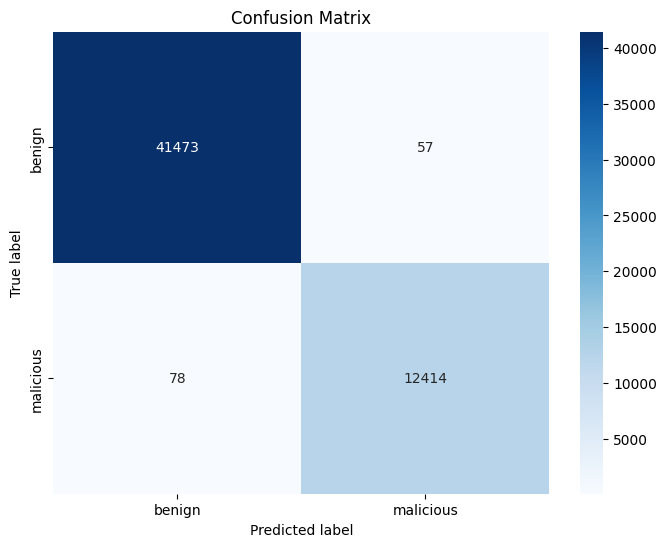

In [65]:
#Confusion Matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions
predictions = dt_model.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define class labels
class_labels = ['benign', 'malicious']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#this was for testing out different models and with different datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Create the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model2 = DecisionTreeClassifier(random_state=42)
# Train the model with the first training data (x_train, y_train)
dt_model.fit(x_train, y_train)
#dt_model2.fit(x_train2, y_train2)

# Predict on the first test data (x_test)
y_pred = dt_model.predict(x_test)

# Evaluate the model performance on the first test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on first dataset: {accuracy * 100:.2f}%")

# Optionally, evaluate on the second dataset (x_train2, y_train2, x_test2, y_test2)
# Train the model again (optional if you want to use the same model for both datasets)

#dt_model2.fit(x_train2, y_train2)

# Predict on the second test data (x_test2)
#y_pred2 = dt_model.predict(x_test2)

# Evaluate the model performance on the second test set
#accuracy2 = accuracy_score(y_test2, y_pred2)
#print(f"Accuracy on second dataset: {accuracy2 * 100:.2f}%")

# Optionally, plot the decision tree

